#### Importing libraries

In [493]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Reading Data

In [494]:
train=pd.read_csv(r'C:\Users\Admin\Desktop\hr analytics\hranalyticstrain.csv')

In [495]:
test=pd.read_csv(r'C:\Users\Admin\Desktop\hr analytics\hranalyticstest.csv')

In [496]:
hr=train.append(test)

#### EDA

In [497]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


In [498]:
hr['is_promoted'].value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

#### Handling imbalanced data

In [499]:
a=hr.loc[(hr['is_promoted']== 0 )]


In [500]:
b=hr.loc[(hr['is_promoted']== 1)]

In [501]:
a= a.sample(frac =.25)

In [502]:
hr=a.append(b)
hr=hr.append(test)

hr['is_promoted'].value_counts(normalize=True)*100
hr['is_promoted'].isnull().sum()

23490

#### Imputing null values

In [503]:
hr['education']=np.where(hr.education.isnull(),"Bachelor's",hr.education)
hr['education'].isnull().sum()

0

In [504]:
hr['education'].isnull().sum()

0

#### univariate analysis-categorical

In [505]:
hr['previous_year_rating'].isnull().sum()

3087

In [506]:
hr['previous_year_rating'].value_counts()

3.0    13532
5.0     9526
4.0     7332
1.0     4301
2.0     2915
Name: previous_year_rating, dtype: int64

<AxesSubplot:xlabel='previous_year_rating', ylabel='Density'>

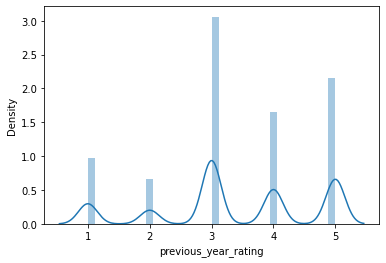

In [507]:
sns.distplot(hr['previous_year_rating'])

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='Density'>

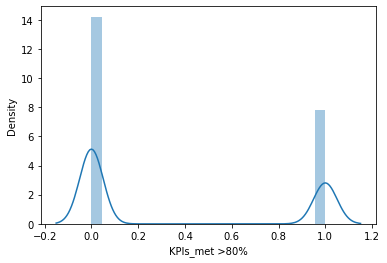

In [14]:
sns.distplot(hr['KPIs_met >80%'])

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

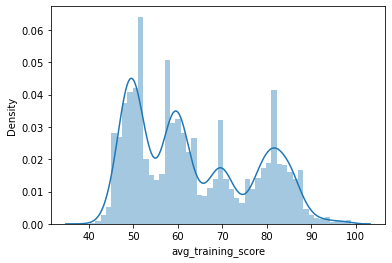

In [15]:
sns.distplot(hr['avg_training_score'])

In [16]:
hr['avg_training_score'].describe()#

count    78298.000000
mean        63.349664
std         13.383664
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [508]:
bins = [30,50,70,90,100]
labels = ['A','B','C','D']
hr['score_binned']= pd.cut(hr['avg_training_score'],bins=bins, labels=labels)
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score_binned
22396,55981,Finance,region_2,Bachelor's,m,sourcing,1,36,3.0,4,1,0,61,0.0,B
28550,75243,Analytics,region_31,Bachelor's,m,other,1,27,5.0,6,1,0,85,0.0,C
49503,66258,Analytics,region_19,Bachelor's,m,other,1,38,4.0,12,0,0,84,0.0,C
19267,1075,Procurement,region_7,Master's & above,f,other,1,34,5.0,4,0,0,65,0.0,B
36132,25722,Procurement,region_20,Master's & above,m,sourcing,1,40,1.0,7,0,0,69,0.0,B


In [509]:
bins = [0,1,3,6,10]
labels = ['A','B','C','D']
hr['no_of_trainings_binned']= pd.cut(hr['no_of_trainings'],bins=bins, labels=labels)

In [510]:
bins = [20,30,45,55,60]
labels = ['A','B','C','D']
hr['age_binned']= pd.cut(hr['age'],bins=bins, labels=labels)

#### Imputing null values

In [511]:
# hr['previous_year_rating']=hr['previous_year_rating'].fillna(hr['previous_year_rating'].groupby(hr['no_of_trainings_binned']).transform('mean'))
hr['previous_year_rating']=np.where(hr.previous_year_rating.isnull(),0,hr.previous_year_rating)

In [479]:
hr['previous_year_rating'].describe()

count    40693.000000
mean         3.133831
std          1.508382
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [512]:
bins = [0,1,2,3,4,5]
labels = ['A','B','C','D','E']
hr['rating_bin']= pd.cut(hr['previous_year_rating'],bins=bins, labels=labels)
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score_binned,no_of_trainings_binned,age_binned,rating_bin
22396,55981,Finance,region_2,Bachelor's,m,sourcing,1,36,3.0,4,1,0,61,0.0,B,A,B,C
28550,75243,Analytics,region_31,Bachelor's,m,other,1,27,5.0,6,1,0,85,0.0,C,A,A,E
49503,66258,Analytics,region_19,Bachelor's,m,other,1,38,4.0,12,0,0,84,0.0,C,A,B,D
19267,1075,Procurement,region_7,Master's & above,f,other,1,34,5.0,4,0,0,65,0.0,B,A,B,E
36132,25722,Procurement,region_20,Master's & above,m,sourcing,1,40,1.0,7,0,0,69,0.0,B,A,B,A


In [481]:
bins = [1,5,10,15,20,30,40]
labels = ['A','B','C','D','E','F']
hr['service_bin']= pd.cut(hr['length_of_service'],bins=bins, labels=labels)
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score_binned,no_of_trainings_binned,age_binned,rating_bin,service_bin
11559,20442,Operations,region_13,Master's & above,m,sourcing,1,43,4.0,11,1,0,59,0.0,B,A,B,D,C
30514,78233,Operations,region_4,Bachelor's,f,other,1,46,5.0,2,0,0,60,0.0,B,A,C,E,A
53835,828,Analytics,region_10,Master's & above,m,sourcing,1,33,5.0,6,1,0,86,0.0,C,A,B,E,B
50017,69611,Operations,region_2,Bachelor's,f,other,1,32,4.0,3,1,0,63,0.0,B,A,B,D,A
21487,50271,Technology,region_23,Bachelor's,m,other,1,30,3.0,5,0,0,80,0.0,C,A,A,C,A


In [513]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40693 entries, 22396 to 23489
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   employee_id             40693 non-null  int64   
 1   department              40693 non-null  object  
 2   region                  40693 non-null  object  
 3   education               40693 non-null  object  
 4   gender                  40693 non-null  object  
 5   recruitment_channel     40693 non-null  object  
 6   no_of_trainings         40693 non-null  int64   
 7   age                     40693 non-null  int64   
 8   previous_year_rating    40693 non-null  float64 
 9   length_of_service       40693 non-null  int64   
 10  KPIs_met >80%           40693 non-null  int64   
 11  awards_won?             40693 non-null  int64   
 12  avg_training_score      40693 non-null  int64   
 13  is_promoted             17203 non-null  float64 
 14  score_binned      

In [387]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40693 entries, 12847 to 23489
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   employee_id             40693 non-null  int64   
 1   department              40693 non-null  object  
 2   region                  40693 non-null  object  
 3   education               40693 non-null  object  
 4   gender                  40693 non-null  object  
 5   recruitment_channel     40693 non-null  object  
 6   no_of_trainings         40693 non-null  int64   
 7   age                     40693 non-null  int64   
 8   previous_year_rating    40693 non-null  float64 
 9   length_of_service       40693 non-null  int64   
 10  KPIs_met >80%           40693 non-null  int64   
 11  awards_won?             40693 non-null  int64   
 12  avg_training_score      40693 non-null  int64   
 13  is_promoted             17203 non-null  float64 
 14  score_binned      

In [514]:
hr.drop(['employee_id','no_of_trainings','avg_training_score','age','previous_year_rating','length_of_service'],axis=1,inplace=True)

In [431]:
hr.head()

,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?,is_promoted,score_binned,no_of_trainings_binned,age_binned,rating_bin,service_bin
25671,Operations,region_2,Bachelor's,f,other,0,0,0.0,B,A,A,D,NaN
2518,Sales & Marketing,region_31,Bachelor's,m,other,0,0,0.0,B,A,B,A,A
5729,Analytics,region_25,Master's & above,m,sourcing,0,0,0.0,C,A,B,C,B
43952,Technology,region_28,Master's & above,f,sourcing,0,0,0.0,C,A,B,C,B
9398,Sales & Marketing,region_1,Master's & above,m,sourcing,0,0,0.0,A,B,B,C,A


#### One hot encoding

In [515]:
hr=pd.get_dummies(hr)

In [516]:
hr.head()

,KPIs_met >80%,awards_won?,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,...,no_of_trainings_binned_D,age_binned_A,age_binned_B,age_binned_C,age_binned_D,rating_bin_A,rating_bin_B,rating_bin_C,rating_bin_D,rating_bin_E
22396,1,0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
28550,1,0,0.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
49503,0,0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
19267,0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
36132,0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


#### Preparing dataset for training model and testing

In [517]:
test_cl=hr[hr['is_promoted'].isnull()]
train_cl=hr[hr['is_promoted'].notnull()]

In [518]:
X=train_cl.drop('is_promoted',axis=1)#splitting the dataset into x=independent variable,y=dependent variable
Y=train_cl['is_promoted']

In [519]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [521]:
test_cl=test_cl.drop("is_promoted",axis=1)

#### Training Model in splitted train dataset

In [522]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [523]:
lr.fit(X_train,Y_train)

LogisticRegression()

#### Predicting promotions on splitted train dataset

In [524]:
pred_labels=lr.predict(X_test)
pred_labels

array([0., 0., 0., ..., 0., 0., 0.])

#### Checking acciracy and other measures of model

In [525]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(Y_test,pred_labels)

0.7858180761406568

In [526]:
x=classification_report(Y_test,pred_labels)
print(x)

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      2505
         1.0       0.67      0.42      0.51       936

    accuracy                           0.79      3441
   macro avg       0.74      0.67      0.69      3441
weighted avg       0.77      0.79      0.77      3441



#### Predicting on test dataset

In [527]:
pred_labels=lr.predict(test_cl)
pred_labels

array([0., 0., 0., ..., 0., 0., 1.])

#### Exporting output file

In [528]:
predicted=pd.concat([test_cl,pd.DataFrame(pred_labels)],axis=1)

In [529]:
predicted.to_csv("logisticoutput010503.csv")